In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon

1999997.519


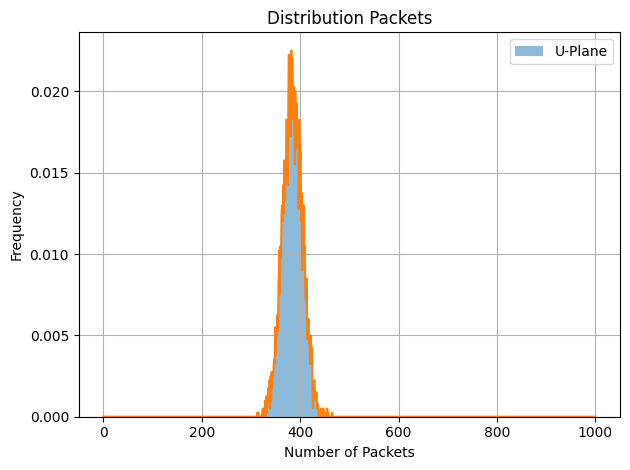

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Prueba/"
plt.rcParams["figure.autolayout"] = True

Flow_max_value = 1
RU = 1
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = []
delta = 500
T = 1000

for ru in Ru:
    # CTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    CTx = pd.read_csv(f"{folder}TxFile{ru-1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    Tsimulation = CTx["Time"].iloc[-1] * 1e-9
    print(Tsimulation)

    # Initialize variables
    taux = 0
    max_events = 1000  # Adjust this value based on your expectation
    distribution = np.zeros(max_events + 1)

    while (taux + T <= Tsimulation):
        ttop = taux + T
        vector = CTx[(taux < CTx['Time'] * 1e-9) & (CTx['Time'] * 1e-9 <= ttop)]
        num = len(vector)
        if num <= max_events:
            distribution[num] += 1
        taux += delta

    total = sum(distribution)
    distribution_normalized = distribution / total

    # Plot distribution as histogram
    plt.hist(np.arange(len(distribution_normalized)), weights=distribution_normalized, bins=len(distribution_normalized), alpha=0.5, label=configs_txt[ru-1])
    plt.plot(np.arange(len(distribution_normalized)),distribution_normalized)
plt.xlabel('Number of Packets')
plt.ylabel('Frequency')
plt.title('Distribution Packets')
plt.legend()
plt.grid(True)
plt.show()


0.9574468085106382
Time inter departures: 2.61


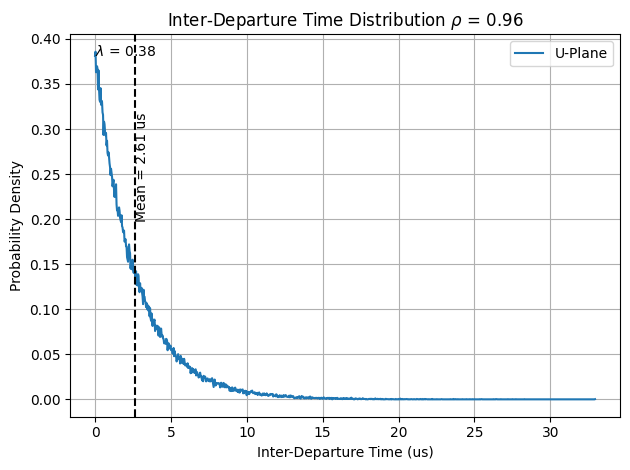

Source BitRate: 4.558855547345226 Gbps


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set a custom color palette
colors = plt.cm.Set3.colors

C = 4.5e9
Pkt_size = 1494
lambda_i = (C/8)/Pkt_size 

channel_cap = 4.7
folder = f"./sim_results/PruebaTime_{channel_cap:.2f}/"
plt.rcParams["figure.autolayout"] = True



ts = (Pkt_size*8)/(channel_cap*1e9)
rho = lambda_i * ts


Flow_max_value = 1
RU = 1
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = []

Type = "Tx"

pkt_size = 1494

def getpdf(vector, puntos):
    y, x = np.histogram(vector, bins=puntos)
    bin_width = x[1] - x[0]
    y_normalized = y / (len(vector) * bin_width)
    return x, y_normalized

print(rho)
for ru in Ru:
    if Type=="Tx":
        CTx = pd.read_csv(f"{folder}{Type}File{ru-1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        inter_arrival_times = np.diff(CTx['Time'] * 10**-9)  # Compute differences and convert to seconds
    else:
        Tx = pd.read_csv(f"{folder}TxFile{ru-1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        CTx = pd.read_csv(f"{folder}file.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        inter_arrival_times = np.diff(CTx.query("Value=='Enqueue'")["Time"].values * 10**-9)  # Compute differences and convert to seconds
        # dif =  Tx["Time"].values - CTx.query("Value=='Enqueue'")["Time"].values 
        # print(f"Values different from zero: {np.count_nonzero(dif)}")
        # print(dif) 
        # print(inter_arrival_times)
    x, y = getpdf(inter_arrival_times, 1000)
    
    # Plot distribution with bars
    # plt.plot(x[:-1], y, width=x[1]-x[0], alpha=0.5, label=configs_txt[ru-1])  # Plotting up to the second to last value of x
    plt.plot(x[:-1], y, label=configs_txt[ru-1])  # Plotting up to the second to last value of x
# Plot exponential theoretical distribution
mean_interarrival_time = np.mean(inter_arrival_times)
print(f"Time inter departures: {mean_interarrival_time:.2f}")
# x_exp = np.linspace(0, max(x[:-1]), 2000)
# y_exp = expon.pdf(x_exp)
# plt.plot(x_exp, y_exp, color='red', linestyle='--', label=f'Exponential (mean={mean_interarrival_time:.2f}us)')
plt.axvline(x=mean_interarrival_time, ls='--', color="black")
plt.text(mean_interarrival_time, 0.2, f'Mean = {mean_interarrival_time:.2f} us', rotation = 90)
plt.text(0,y[0], f'$\lambda$ = {y[0]:.2f}')
if (Type == "Rx"):
    plt.xlabel('Inter-Arrival Time (us)')  # Update xlabel to reflect inter-arrival times
    plt.title("Inter-Arrival Time Distribution " +  r"$\rho$ =  "+ f"{rho:.2f}")
else:
    plt.xlabel('Inter-Departure Time (us)')  # Update xlabel to reflect inter-arrival times
    plt.title("Inter-Departure Time Distribution " + r"$\rho$ = " + f"{rho:.2f}")
plt.ylabel('Probability Density')

plt.legend()
plt.grid(True)
plt.show()
print(f"Source BitRate: {((y[0]*pkt_size*8)/10**-6)*10**-9} Gbps")

0.9782608695652174
Values different from zero: 0
Time inter departures: 2.60


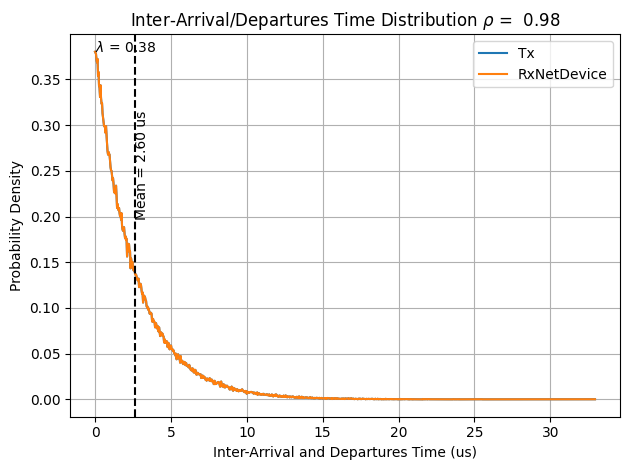

Source BitRate: 4.5456361960341525 Gbps


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set a custom color palette
colors = plt.cm.Set3.colors

C = 4.5e9
Pkt_size = 1494
lambda_i = (C/8)/Pkt_size 

channel_cap = 4.6
folder = f"./sim_results/PruebaTime_{channel_cap:.2f}/"
plt.rcParams["figure.autolayout"] = True



ts = (Pkt_size*8)/(channel_cap*1e9)
rho = lambda_i * ts


Flow_max_value = 1
RU = 1
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = []

Type = "Tx"

pkt_size = 1494

def getpdf(vector, puntos):
    y, x = np.histogram(vector, bins=puntos)
    bin_width = x[1] - x[0]
    y_normalized = y / (len(vector) * bin_width)
    return x, y_normalized

print(rho)
for ru in Ru:

    CTx = pd.read_csv(f"{folder}{Type}File{ru-1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    inter_arrival_times = np.diff(CTx['Time'] * 10**-9)  # Compute differences and convert to seconds

    Tx = pd.read_csv(f"{folder}TxFile{ru-1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    CTx = pd.read_csv(f"{folder}file.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    inter_dep_times = np.diff(CTx.query("Value=='Enqueue'")["Time"].values * 10**-9)  # Compute differences and convert to seconds
    dif =  Tx["Time"].values - CTx.query("Value=='Enqueue'")["Time"].values 
    print(f"Values different from zero: {np.count_nonzero(dif)}")
   
    # print(dif) 

    x, y = getpdf(inter_arrival_times, 1000)
    x2, y2 = getpdf(inter_dep_times, 1000)
    
    # Plot distribution with bars
    # plt.plot(x[:-1], y, width=x[1]-x[0], alpha=0.5, label=configs_txt[ru-1])  # Plotting up to the second to last value of x
    plt.plot(x[:-1], y, label="Tx")  # Plotting up to the second to last value of x
    plt.plot(x2[:-1], y2, label="RxNetDevice")  
# Plot exponential theoretical distribution
mean_interarrival_time = np.mean(inter_arrival_times)
print(f"Time inter departures: {mean_interarrival_time:.2f}")
plt.axvline(x=mean_interarrival_time, ls='--', color="black")
plt.text(mean_interarrival_time, 0.2, f'Mean = {mean_interarrival_time:.2f} us', rotation = 90)
plt.text(0,y[0], f'$\lambda$ = {y[0]:.2f}')

plt.xlabel('Inter-Arrival and Departures Time (us)')  # Update xlabel to reflect inter-arrival times
plt.title("Inter-Arrival/Departures Time Distribution " +  r"$\rho$ =  "+ f"{rho:.2f}")

plt.ylabel('Probability Density')

plt.legend()
plt.grid(True)
plt.show()
print(f"Source BitRate: {((y[0]*pkt_size*8)/10**-6)*10**-9} Gbps")

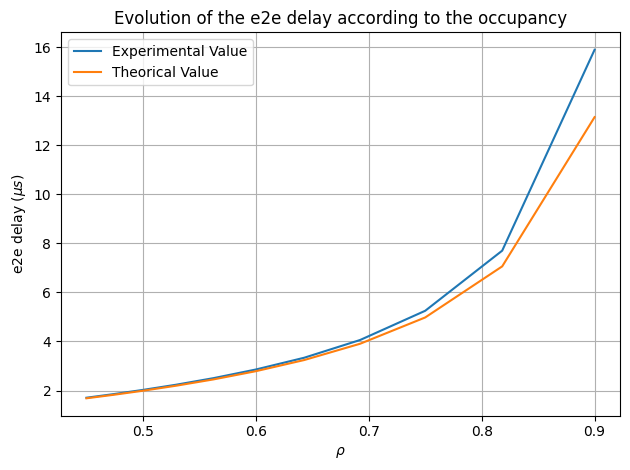

Theorical Values: [1.6841454545454546, 1.8242526315789473, 1.9920000000000002, 2.197058823529412, 2.4544285714285716, 2.7887999999999997, 3.2441142857142857, 3.9073846153846157, 4.9799999999999995, 7.062545454545452, 13.14719999999999]
Experimental Values: [1.7075963330795354, 1.8521534126591568, 2.0256068064223904, 2.237310793462011, 2.5054283455508437, 2.8575799130787574, 3.3377488815281247, 4.060251921548576, 5.2519834243857435, 7.703576447900052, 15.893755322814604]


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon

Foldername = "./sim_results/PruebaTime_"

Min = 10
Max = 4.5
swept = np.arange(Min, Max, -0.5)

C = 4.5e9
Pkt_size = 1494
lambda_i = (C/8)/Pkt_size 
avg_e2e_delay = []
theory_e2e_delay = []
rho_i = []
for i in swept:
    Tx = pd.read_csv(f"{Foldername}{i:.2f}/TxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    Rx = pd.read_csv(f"{Foldername}{i:.2f}/RxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    avg_e2e_delay.append(np.mean(Rx["Time"] - Tx["Time"])*1e-9)
    ts = (Pkt_size*8)/(i*1e9)
    rho = lambda_i * ts
    tq = (1/2)*(rho/(1-rho))*ts
    # theory_e2e_delay.append((ts+ tq + 2*(Pkt_size*8/100e9))*1e6)
    theory_e2e_delay.append((ts+ tq)*1e6)
    lq = (rho**2/2*(1-rho))
    rho_i.append(rho)
plt.plot(rho_i,avg_e2e_delay, label ="Experimental Value")   
plt.plot(rho_i,theory_e2e_delay, label = "Theorical Value")

plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho$')
plt.ylabel(r"e2e delay ($\mu s$)")
plt.title("Evolution of the e2e delay according to the occupancy")
plt.show()

print(f"Theorical Values: {theory_e2e_delay}")
print(f"Experimental Values: {avg_e2e_delay}")


[5.  4.9 4.8 4.7 4.6]
[15.893755322814604, 20.733325904642285, 30.228950912284017, 56.15551891259525, 335.6095890025732]


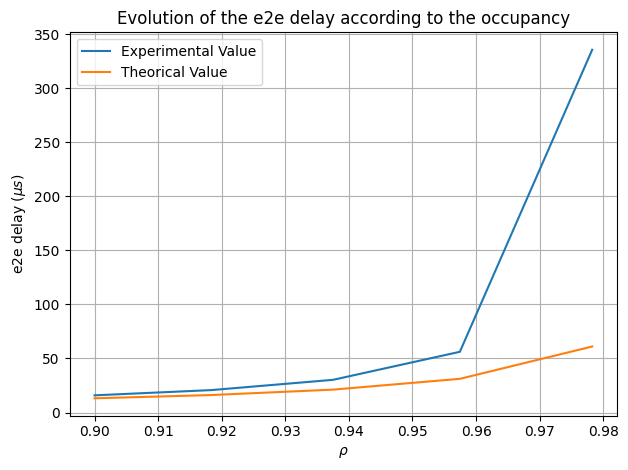

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon

Foldername = "./sim_results/PruebaTime_"

Min = 5
Max = 4.6
swept = np.arange(Min, Max, -0.1)
print(swept)
C = 4.5e9
Pkt_size = 1494
lambda_i = (C/8)/Pkt_size 
avg_e2e_delay = []
theory_e2e_delay = []
rho_i = []
for i in swept:
    Tx = pd.read_csv(f"{Foldername}{i:.2f}/TxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    Rx = pd.read_csv(f"{Foldername}{i:.2f}/RxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    avg_e2e_delay.append(np.mean(Rx["Time"] - Tx["Time"])*1e-9)
    ts = (Pkt_size*8)/(i*1e9)
    rho = lambda_i * ts
    tq = (1/2)*(rho/(1-rho))*ts
    # theory_e2e_delay.append((ts+ tq + 2*(Pkt_size*8/100e9))*1e6)
    theory_e2e_delay.append((ts+ tq)*1e6)
    rho_i.append(rho)
    # Check if the arrays have different values
    if not np.array_equal(len(Tx), len(Rx)):
        print("**************The arrays have different values.**************")
        print(f"Tx: {len(Tx)} Rx: {len(Rx)}")
plt.plot(rho_i,avg_e2e_delay, label ="Experimental Value")   
plt.plot(rho_i,theory_e2e_delay, label = "Theorical Value")
print(avg_e2e_delay)
plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho$')
plt.ylabel(r"e2e delay ($\mu s$)")
plt.title("Evolution of the e2e delay according to the occupancy")
plt.show()


In [113]:
C = 4.5e9
Pkt_size = 1494
lambda_i = (C/8)/Pkt_size 

ts = (Pkt_size*8)/(10*1e9)
rho = lambda_i * ts
tq = (1/2)*(rho/(1-rho))*ts
Tx = pd.read_csv(f"./sim_results/PruebaTime_10.00/TxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
Rx_first_router = pd.read_csv(f"./sim_results/PruebaTime_10.00/file.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
Rx =  pd.read_csv(f"./sim_results/PruebaTime_10.00/RxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
min_len = len(Rx_first_router.query("Value=='Rx'")["Time"] )
lentx = len(Tx["Time"])
print(f"lenght rx {min_len} || length tx {lentx}")
ts_1 = np.mean((Rx_first_router.query("Value=='Rx'")["Time"].values[:lentx] - Tx["Time"][0:min_len]))

print(f"Theory: {((1492*8)/(10e9))*1e6} || Experimental: {ts_1}")

e2e = np.mean(Rx["Time"] - Tx["Time"])

print(f"E2E Delay: Theory {(tq+ts)*1e6} us|| Exp {e2e*1e-9} us")

lenght rx 0 || length tx 1152931
Theory: 1.1936 || Experimental: nan
E2E Delay: Theory 1.6841454545454546 us|| Exp 1.7039088236059432 us


In [88]:
import pandas as pd
import numpy as np

# Load Tx and Rx data
Tx = pd.read_csv("./sim_results/PruebaTime_10.00/TxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
Rx_first_router = pd.read_csv("./sim_results/PruebaTime_10.00/file.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

# Extract the Time values from Tx and Rx data
Tx_time = Tx["Time"].values
Rx_time = Rx_first_router.query("Value=='Rx'")["Time"].values[:len(Tx_time)]  # Ensure Rx has same length as Tx

# Check if the arrays have different values
if not np.array_equal(Tx_time, Rx_time):
    print("The arrays have different values.")
else:
    print("The arrays have the same values.")

Rx_time = len(Rx_first_router.query("Value=='Rx'")["Time"].values)  # Ensure Rx has same length as Tx
Tx2_time = len( Rx_first_router.query("Value=='Tx_complete'")["Time"].values)  # Ensure Rx has same length as Tx
Tx22_time = len(Rx_first_router.query("Value=='Send'")["Time"].values)
print(f"Len1: {Rx_time} Len2: {Tx2_time+Tx22_time}")

ts_1 = np.mean((Rx_first_router.query("Value!='Rx'")["Time"].values - Rx_first_router.query("Value=='Rx'")["Time"].values))*1e-9

print(np.mean(Rx_first_router.query("Value=='Tx_complete'")["Time"].values))


print(f"Theory: {((1494*8)/(10*1e9))*1e6} us || Experimental: {ts_1}")




The arrays have the same values.
Len1: 1152931 Len2: 1152931
1499745444689481.0
Theory: 1.1952 us || Experimental: 0.5089083822015368


In [63]:
C = 4.5e9
Pkt_size = 1494
lambda_i = (C/8)/Pkt_size 

channel_cap = 4.7
ts = (Pkt_size*8)/(channel_cap*1e9)
rho = lambda_i * ts

tq = (1/2)*(rho/(1-rho))*ts
Tx = pd.read_csv(f"./sim_results/PruebaTime_{channel_cap:.2f}/TxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
Rx_first_router = pd.read_csv(f"./sim_results/PruebaTime_{channel_cap:.2f}/file.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
Rx =  pd.read_csv(f"./sim_results/PruebaTime_{channel_cap:.2f}/RxFile0.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
min_len = len(Rx_first_router.query("Value=='Enqueue'")["Time"] )
lentx = len(Tx["Time"])
print(f"lenght rx {min_len} || length tx {lentx}")
ts_1 = np.mean((Rx_first_router.query("Value=='Enqueue'")["Time"].values[:lentx] - Tx["Time"][0:min_len]))

print(f"Theory: {((1492*8)/(10e9))*1e6} || Experimental: {ts_1}")

e2e = np.mean(Rx["Time"] - Tx["Time"])

print(f"E2E Delay: Theory {(tq+ts)*1e6} us|| Exp {e2e*1e-9} us")



Rx_time = len(Rx_first_router.query("Value=='Enqueue'")["Time"].values)  # Ensure Rx has same length as Tx
Tx2_time = len( Rx_first_router.query("Value!='Enqueue'")["Time"].values)  # Ensure Rx has same length as Tx


# Check if the arrays have different values
if not np.array_equal(Tx2_time, Rx_time):
    print("**************The arrays have different values.**************")
    print(f"RxLen1: {Rx_time} TxLen2: {Tx2_time}")


ts_1 = np.mean(Rx_first_router.query("Value!='Enqueue'")["Time"].values[0:Tx2_time] - Rx_first_router.query("Value=='Enqueue'")["Time"].values[0:Tx2_time])*1e-9




print(f"QueueTime Theory : {tq*1e6} us || Experimental: {ts_1} us")


0.9574468085106382
lenght rx 359866 || length tx 359866
Theory: 1.1936 || Experimental: 491798705.6293176
E2E Delay: Theory 31.15148936170208 us|| Exp 56.15551891259525 us
QueueTime Theory : 28.60851063829783 us || Experimental: 53.12072020696593 us


[5.  4.9 4.8 4.7 4.6]
[13.503755322814605, 18.294325904642285, 27.73871255411737, 53.12072020696593, 179.75101074010882]
[10.75679999999999, 13.720408163265288, 18.674999999999926, 28.608510638297748, 58.46086956521681]


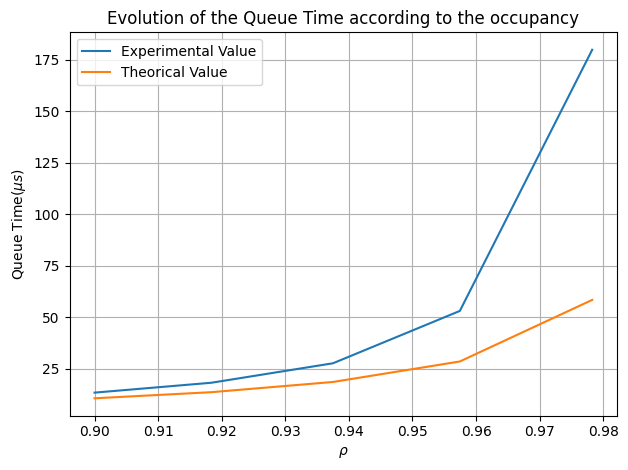

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon

Foldername = "./sim_results/PruebaTime_"

Min = 5
Max = 4.6
swept = np.arange(Min, Max, -0.1)
print(swept)
C = 4.5e9
Pkt_size = 1494
lambda_i = (C/8)/Pkt_size 
avg_e2e_delay = []
theory_e2e_delay = []
rho_i = []
for i in swept:
    Rx_first_router = pd.read_csv(f"{Foldername}{i:.2f}/file.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    tq = Rx_first_router.query("Value!='Enqueue'")["Time"].values - Rx_first_router.query("Value=='Enqueue'")["Time"].values
    avg_e2e_delay.append(np.mean(tq)*1e-9)
    ts = (Pkt_size*8)/(i*1e9)
    rho = lambda_i * ts
    tq = (1/2)*(rho/(1-rho))*ts

    theory_e2e_delay.append(( tq)*1e6)
    rho_i.append(rho)
    # Check if the arrays have different values
    if not np.array_equal(len(Tx), len(Rx)):
        print("**************The arrays have different values.**************")
        print(f"Tx: {len(Tx)} Rx: {len(Rx)}")
plt.plot(rho_i,avg_e2e_delay, label ="Experimental Value")   
plt.plot(rho_i,theory_e2e_delay, label = "Theorical Value")
print(avg_e2e_delay)
print(theory_e2e_delay)
plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho$')
plt.ylabel(r"Queue Time($\mu s$)")
plt.title("Evolution of the Queue Time according to the occupancy")
plt.show()


In [55]:
logs = pd.read_csv(f"./time.log", sep='\s+', header=None, names=["method", "Time"])
cmp1 = logs.query("method=='IPv4Interace::Send()'")["Time"].values - logs.query("method=='Poissonapp::SendPacket()'")["Time"].values
cmp2 = logs.query("method=='TCL::Send()'")["Time"].values - logs.query("method=='IPv4Interace::Send()'")["Time"].values
cmp3 = logs.query("method=='NetDevice::Send()'")["Time"].values - logs.query("method=='TCL::Send()'")["Time"].values[0:len(logs.query("method=='NetDevice::Send()'")["Time"].values)]



# Extracting the required values from the DataFrame
net_device_times = logs.query("method=='NetDevice::Send()'")["Time"].values
tcl_times = logs.query("method=='TCL::Send()'")["Time"].values[0:len(net_device_times)]

## Creating a DataFrame with column names
df = pd.DataFrame({
    'NetDevice::Send()': net_device_times,
    'TCL::Send()': tcl_times,
    'cmp3': cmp3
})



# Counting non-zero elements in cmp1, cmp2, and printing non-zero elements of cmp3
print(f"Diff cmp1: {np.count_nonzero(cmp1)}")
print(f"Diff cmp2: {np.count_nonzero(cmp2)}")
# Filtering rows where cmp3 is non-zero
non_zero_cmp3_rows = df[df['cmp3'] != 0]

# Printing rows with cmp3 different from zero
print("Rows with cmp3 different from zero:")
print(non_zero_cmp3_rows)

# Writing DataFrame to a text file
df.to_csv('output.txt', sep='\t', index=False)





Diff cmp1: 0
Diff cmp2: 0
Rows with cmp3 different from zero:
       NetDevice::Send()      TCL::Send()         cmp3
8459      21774811000000   21773630000000   1181000000
8460      21777409000000   21774380000000   3029000000
8462      21782605000000   21781780000000    825000000
8463      21785203000000   21782713000000   2490000000
8464      21787801000000   21786907000000    894000000
...                  ...              ...          ...
95144    247718578000000  247705396000000  13182000000
95145    247721176000000  247715608000000   5568000000
95146    247723774000000  247721512000000   2262000000
95147    247726372000000  247723681000000   2691000000
95156    247749754000000  247748466000000   1288000000

[23732 rows x 3 columns]
